See [this tutorial](https://minireference.com/static/tutorials/sympy_tutorial.pdf)

In [13]:
%doctest_mode
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
init_printing(use_latex=True)

Exception reporting mode: Context
Doctest mode is: OFF


# Simple example

## Pose the differential equation


In [274]:
x, t, k, C1,= symbols('x t k C1')
Y = symbols('Y', cls=Function)

In [277]:
dydt = Y(t)+t
dydt            

## Solve the differential equation

In [278]:
yt = dsolve(Eq(Y(t).diff(t) , dydt), Y(t))
yt

## Check the solution

substituting the solution into the expresion for $dy/dt$ must equal to the derivative of the solution

In [187]:
simplify(dydt.subs(Y(t), yt.rhs)-diff(yt.rhs, t))

## Set initial conditions and solve for constants

- $Y(0)=2.$
- Solve for $C1$ 

In [188]:
eq1 = Eq(yt.rhs.subs({ t:0}).evalf(), 2.)
sol = solve([eq1], [C1])
C1_val = sol[C1]
C1_val

## Define evaluable function and check initial conditions hold

In [189]:
fY = lambda t_val: N(yt.rhs.subs({C1: C1_val, t: t_val }))

In [190]:
fY(0), fY(100), fY(200)

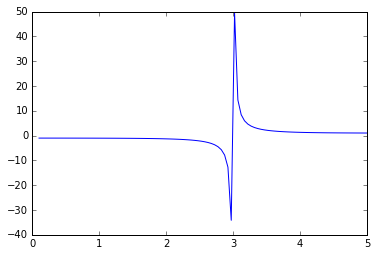

In [191]:
t_vals = np.linspace(0.1,5,100)
plt.plot(t_vals, [fP(i) for i in t_vals])

# US Census Data 1790-2000

Based on EdX [Introduction to Differential Equations](https://courses.edx.org/courses/course-v1%3ABUx%2BMath226.1x%2B1T2016/)

Given a population $p$ at a certain time, assumes the relative growth rate decreases linearly with $p$. The relative growth rate is defined as $\delta p / p = \frac{dp}{dt} \frac{1}{p}$


<img src="imgs/difflr.jpg"/>


this is, 

$$\frac{dp}{dt} = k p (1-\frac{p}{N})$$


meaning that $\frac{1}{p}\frac{dp}{dt}$ is linear in $p$

## Load data

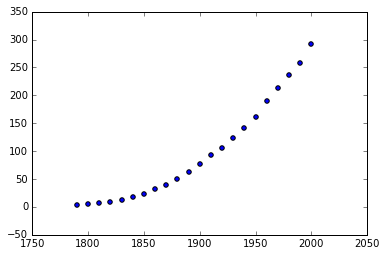

In [19]:
import pandas as pd
uscensus = pd.read_csv("data/uspop.csv")
uscensus["population"] = uscensus["population"]/1e6
%matplotlib inline
plt.scatter(uscensus["year"], uscensus["population"])

## Estimate $k$ and $N$ from data

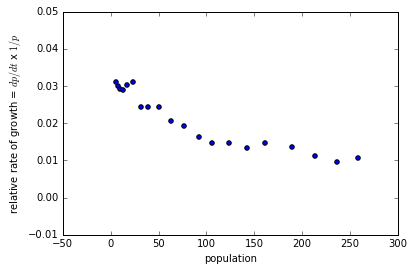

In [100]:
pop = uscensus["population"].as_matrix()
uscensus["relgrowth"] = [None]+list((pop[2:]-pop[:-2])/20/pop[1:-1])+[None]
plt.scatter(uscensus["population"], uscensus["relgrowth"])
plt.xlabel("population")
plt.ylabel("relative rate of growth = $dp/dt$ x $1/p$")

In [21]:
X = uscensus["population"].as_matrix()[1:-1].reshape((-1,1))
y = uscensus["relgrowth"].as_matrix()[1:-1]

In [119]:
lr = LinearRegression().fit(X,y)
kN = lr.coef_ [0]
k  = lr.intercept_
N  = -k/kN
print "N", N
print "k", k

N 329.688289793
k 0.0286629770895


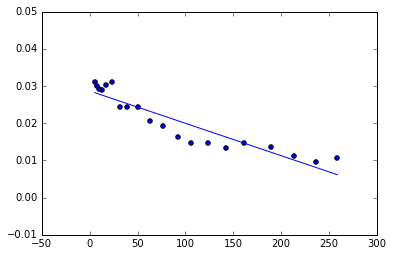

In [120]:
plt.scatter(uscensus["population"], uscensus["relgrowth"])
x = np.linspace(np.min(X), np.max(X), 100)
plt.plot(x, k+kN*x)

In [121]:
growth_f = lambda p: k*p*(1-p/N)

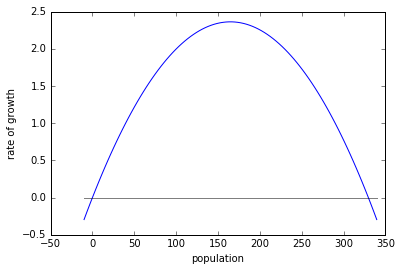

In [123]:
x=np.linspace(-10, N+10, 100)
plt.plot(x, growth_f(x))

plt.plot([-10, N+10], [0,0], color="black", alpha=0.5)
plt.xlabel("population")
plt.ylabel("rate of growth")

In [128]:
t, C1, C2, k_sym, N_sym= symbols("t C1 C2 k N")
P = symbols('P', cls=Function)


In [129]:
diffeq = Eq(P(t).diff(t) , k_sym*P(t)*(1-P(t)/N_sym))
diffeq

Derivative(P(t), t) == k*(1 - P(t)/N)*P(t)

In [152]:
pt = dsolve(diffeq, P(t))
pt

P(t) == C1*exp(k*t)/(C2*exp(k*t) - 1)

In [153]:
t0 = 0
p0 = uscensus["population"].iloc[0]
t1 = uscensus["year"].iloc[1] -uscensus["year"].iloc[0]
p1 = uscensus["population"].iloc[1]
eq1 = Eq(pt.rhs.subs({ t: t0, k_sym:k, N_sym: N}).evalf(), p0)
eq2 = Eq(pt.rhs.subs({ t: t1, k_sym:k, N_sym: N}).evalf(), p1)

In [156]:
sol = solve([eq1, eq2], [C1, C2])
sol

{C1: -3.76871441029036, C2: 0.0408477598088681}

In [162]:
ptf = lambda x : pt.rhs.subs({k_sym: k, C1: sol[C1], C2: sol[C2], t: x}).evalf()


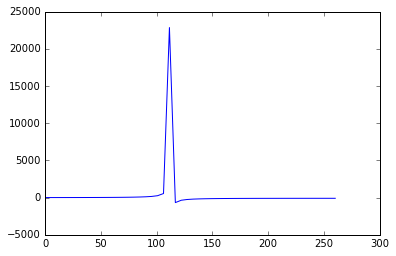

In [163]:
x = np.linspace(0,260)
plt.plot(x, [ptf(i) for i in x])

In [48]:
-0.00303316808925137*0.0286629770895345

-8.693962745091916e-05

In [72]:
growth.subs({k: k_val, N: N_val, P(0): 0}).evalf()

0.0286629770895345*(-0.00303316808925137*P(t) + 1.0)*P(t)

# Euler's method


In [315]:
dydt = lambda y,t: 9.8 - .18/54 * y**2
t = [0.]
y = [0.]
dt = .1

print "    t     y     dydt"
for i in range(200):
#    print "%6.3f"%t[-1], "%6.3f"%y[-1], "%6.3f"%dydt(y[-1], t[-1])
    y.append(y[-1]+dydt(y[-1], t[-1])*dt)
    t.append(t[-1]+dt)

    t     y     dydt


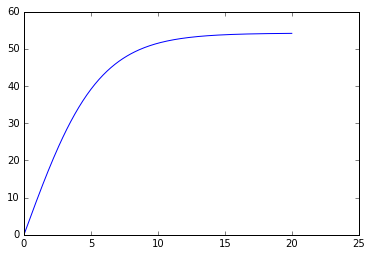

In [310]:
plt.plot(t,y)

In [312]:
print y[-10]

54.1235882163


In [313]:
54.1235882163*.95

In [317]:
y, t, C1,= symbols('y t C1')
Y = symbols('Y', cls=Function)
dydt = 2*Y(t)**3+t**2
yt = dsolve(Eq(Y(t).diff(t) , dydt), Y(t))
yt


In [273]:
yt.rhs

In [280]:
simplify(yt)

In [281]:
yt.subs({Y(t): .2, t:0.})

In [341]:
integrate(1/y**(1./3))

In [374]:
## Pose the differential equation

x, t, k, C1,= symbols('x t k C1')
Y = symbols('Y', cls=Function)
dydt = Y(t)*(Y(t)-1)*(Y(t)-3)
print dydt            
## Solve the differential equation
yt = dsolve(Eq(Y(t).diff(t) , dydt), Y(t))
print yt
#yt = yt[1]
## Check the solution

print simplify(dydt.subs(Y(t), yt.rhs)-diff(yt.rhs, t))
eq1 = Eq(yt.rhs.subs({ t:0}).evalf(), 1.)
sol = solve([eq1], [C1])
print sol
C1_val = sol[0][0]
C1_val

(Y(t) - 3)*(Y(t) - 1)*Y(t)
[Eq(Y(t), (-C1*((C1*sqrt(-exp(12*C1 + 6*t)/(exp(18*C1) - exp(18*t) + 3*exp(C1 + 12*t) - 3*exp(12*C1 + 6*t))) - C1 - sqrt(-exp(12*C1 + 6*t)/(exp(18*C1) - exp(18*t) + 3*exp(C1 + 12*t) - 3*exp(12*C1 + 6*t)))*exp(6*t))/(C1 - exp(6*t)))**(1/3) + C1 - C1/((C1*sqrt(-exp(12*C1 + 6*t)/(exp(18*C1) - exp(18*t) + 3*exp(C1 + 12*t) - 3*exp(12*C1 + 6*t))) - C1 - sqrt(-exp(12*C1 + 6*t)/(exp(18*C1) - exp(18*t) + 3*exp(C1 + 12*t) - 3*exp(12*C1 + 6*t)))*exp(6*t))/(C1 - exp(6*t)))**(1/3) + ((C1*sqrt(-exp(12*C1 + 6*t)/(exp(18*C1) - exp(18*t) + 3*exp(C1 + 12*t) - 3*exp(12*C1 + 6*t))) - C1 - sqrt(-exp(12*C1 + 6*t)/(exp(18*C1) - exp(18*t) + 3*exp(C1 + 12*t) - 3*exp(12*C1 + 6*t)))*exp(6*t))/(C1 - exp(6*t)))**(1/3)*exp(6*t) - exp(6*t))/(C1 - exp(6*t))), Eq(Y(t), (-C1*((C1*sqrt(-exp(12*C1 + 6*t)/(exp(18*C1) - exp(18*t) + 3*exp(C1 + 12*t) - 3*exp(12*C1 + 6*t))) - C1 - sqrt(-exp(12*C1 + 6*t)/(exp(18*C1) - exp(18*t) + 3*exp(C1 + 12*t) - 3*exp(12*C1 + 6*t)))*exp(6*t))/(C1 - exp(6*t)))**(1/

AttributeError: 'list' object has no attribute 'rhs'

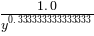

In [346]:
diff ((y**(2./3)*1.5))

In [358]:
yt.rhs

In [360]:
diff((k-cos(2*t)/3)**1.5, t)

In [362]:
expr = -y**2+y+2*y*t**2+2*t-t**2-t**4
expr

In [368]:
simplify(expr.subs({y: t**2+2}))

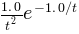

In [369]:
diff(exp(-1./t))

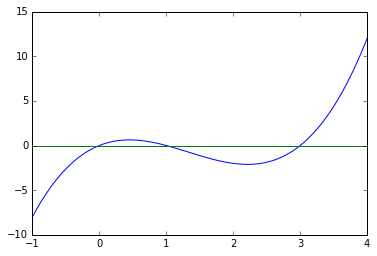

In [372]:
x = np.linspace(-1,4,100)
plt.plot(x, x*(x-1)*(x-3))
plt.plot(x, np.zeros(x.shape))